In [1]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import random 

#Pre-process:Changing Color Spaces

In [2]:
img_bgr = cv2.imread('example1.png') 

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

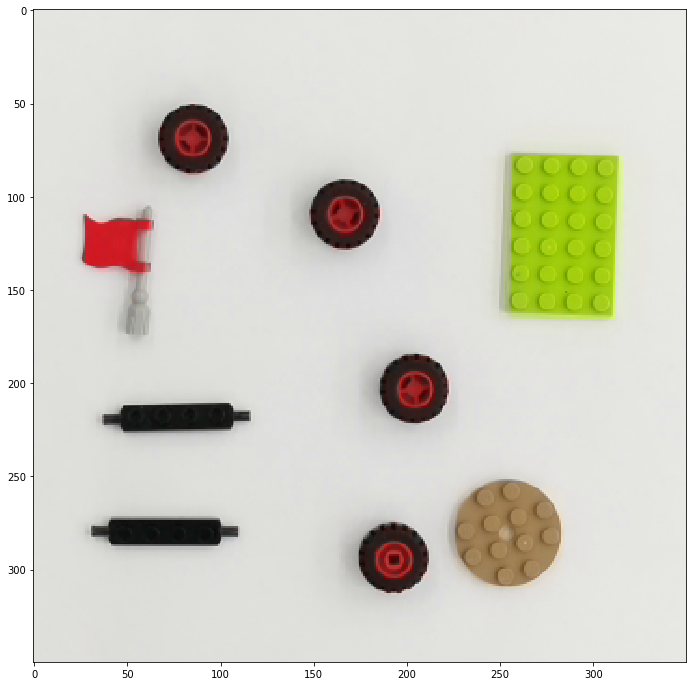

In [4]:
plt.figure(figsize = (12,12))
plt.imshow(img_rgb)
plt.show()

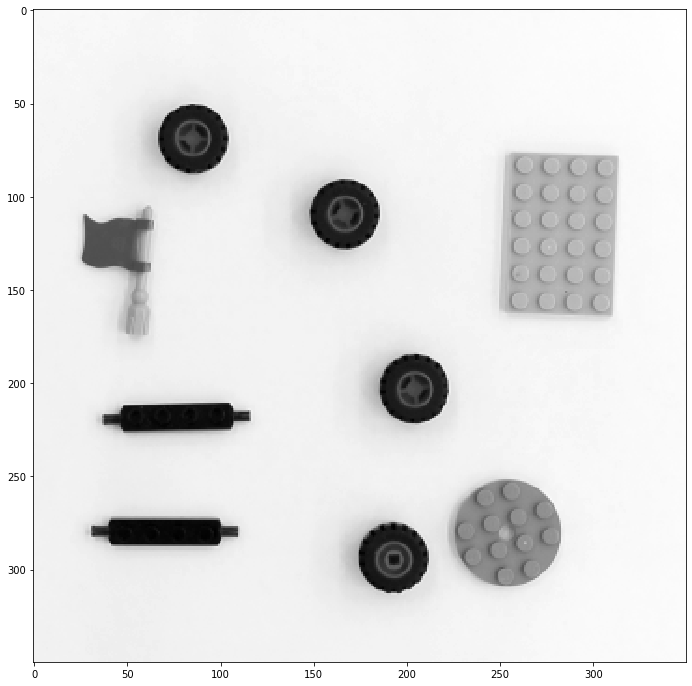

In [6]:
img_grey = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (12,12))
plt.imshow(img_grey,'gray')
plt.show()

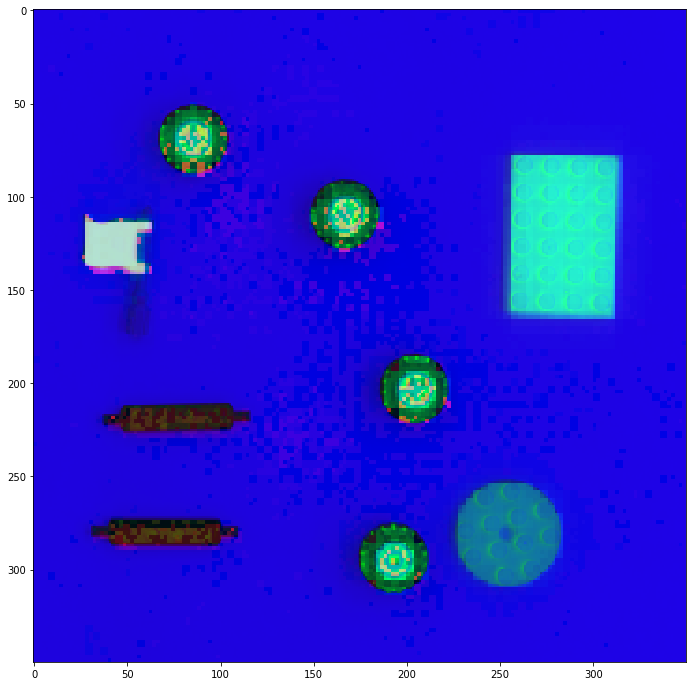

In [7]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
plt.figure(figsize = (12,12))
plt.imshow(img_hsv)
plt.show()

In [8]:
lower = np.array([36,25,25])
upper = np.array([70,255,255])
img_color = cv2.inRange(img_hsv, lower, upper)
print(img_color.shape)

(350, 350)


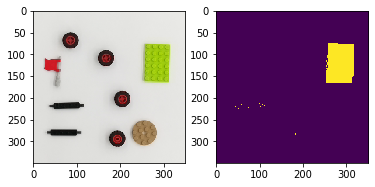

In [9]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_rgb)
axarr[1].imshow(img_color)

#Image Pre-Process: Smoothing

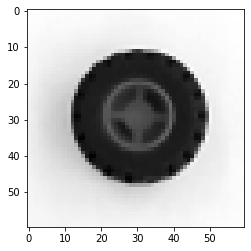

In [10]:
y1=40
h=60
x1=55
w=60
img_roi=img_grey[y1:y1+h,x1:x1+w]
plt.imshow(img_roi,'gray')
plt.show()

In [11]:
ksize=5
img_blur = cv2.blur(img_roi,(ksize,ksize))
img_gaussian = cv2.GaussianBlur(img_roi,(ksize,ksize),0)
img_median = cv2.medianBlur(img_roi,ksize)

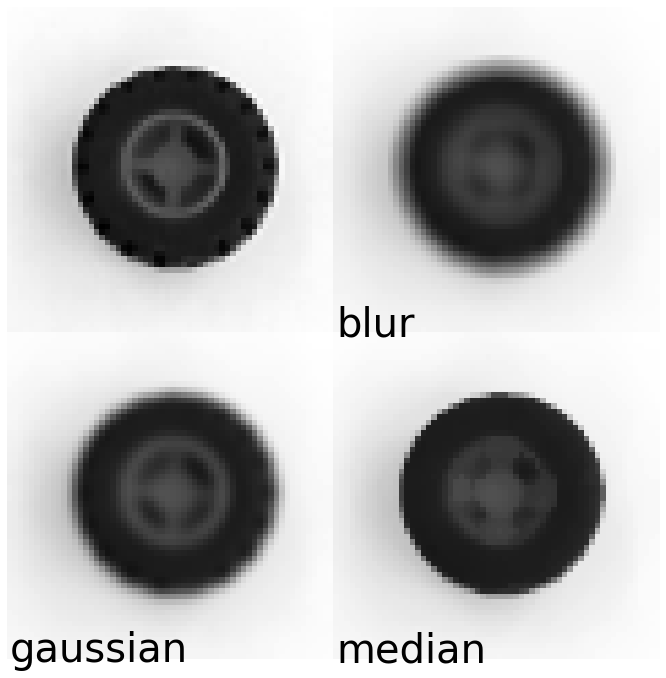

In [14]:
img_up = np.concatenate((img_roi, img_blur), axis=1)
img_down = np.concatenate((img_gaussian, img_median), axis=1)
img_all = np.concatenate((img_up, img_down), axis=0)
plt.figure(figsize = (12,12))
plt.imshow(img_all,'gray')
plt.text(w, h, "blur",fontsize=40)
plt.text(0, h*2, "gaussian",fontsize=40)
plt.text(w, h*2, "median",fontsize=40)
plt.axis('off')
plt.show()

In [15]:
img_pro = cv2.GaussianBlur(img_grey,(ksize,ksize),0)

#Image Pre-Process: Thresholding

In [16]:
ret,img_global = cv2.threshold(img_pro,100,255,cv2.THRESH_BINARY)
img_adaptive = cv2.adaptiveThreshold(img_pro,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,127, 11)
ret2,img_otsu = cv2.threshold(img_pro,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

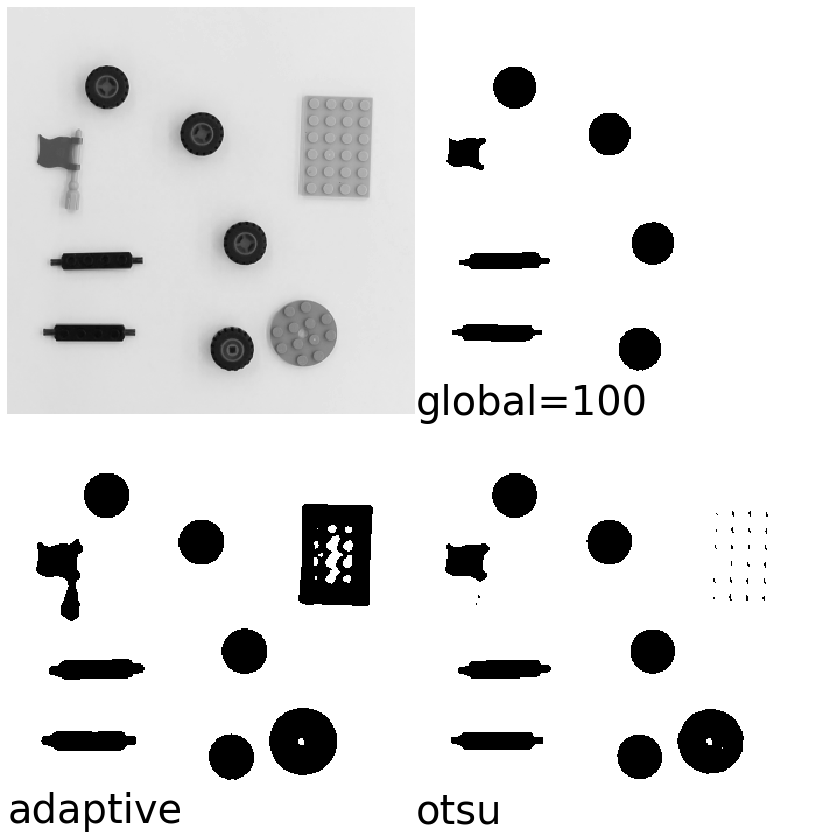

In [19]:
h,w=img_grey.shape
img_up = np.concatenate((img_grey, img_global), axis=1)
img_down = np.concatenate((img_adaptive, img_otsu), axis=1)
img_all = np.concatenate((img_up, img_down), axis=0)
plt.figure(figsize = (15,15))
plt.imshow(img_all,'gray')
plt.text(w, h, "global=100",fontsize=40)
plt.text(0, h*2, "adaptive",fontsize=40)
plt.text(w, h*2, "otsu",fontsize=40)
plt.axis('off')
plt.show()

In [20]:
img_pro=img_otsu.copy()

#Image Pre-Process: Morphological Transformations

In [21]:
y1=240
h=80
x1=220
w=80
img_roi=img_otsu[y1:y1+h,x1:x1+w]

In [22]:
ksize=3
itern=2
kernel = np.ones((ksize,ksize),np.uint8)

In [23]:
img_erode = cv2.erode(img_roi,kernel,itern)
img_dilate = cv2.dilate(img_roi,kernel,itern)
img_open = cv2.morphologyEx(img_roi, cv2.MORPH_OPEN, kernel)

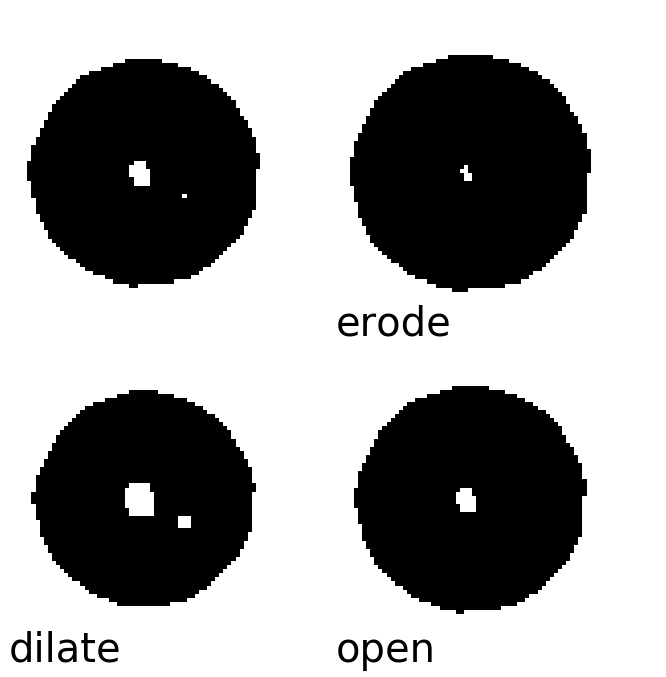

In [25]:
img_up = np.concatenate((img_roi, img_erode), axis=1)
img_down = np.concatenate((img_dilate, img_open), axis=1)
img_all = np.concatenate((img_up, img_down), axis=0)
plt.figure(figsize = (12,12))
plt.imshow(img_all,'gray')
plt.text(w, h, "erode",fontsize=40)
plt.text(0, h*2, "dilate",fontsize=40)
plt.text(w, h*2, "open",fontsize=40)
plt.axis('off')
plt.show()

#Segmentation: Contours

In [26]:
img_pro=img_adaptive.copy()

In [27]:
contours,hierarchy = cv2.findContours(img_pro,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )

In [28]:
print('hierarchy',hierarchy)

hierarchy [[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 5  2  4  0]
  [-1 -1 -1  3]
  [ 6  3 -1  0]
  [ 7  5 -1  0]
  [ 8  6 -1  0]
  [ 9  7 -1  0]
  [21  8 10  0]
  [11 -1 -1  9]
  [12 10 -1  9]
  [13 11 -1  9]
  [14 12 -1  9]
  [15 13 -1  9]
  [16 14 -1  9]
  [17 15 -1  9]
  [18 16 -1  9]
  [19 17 -1  9]
  [20 18 -1  9]
  [-1 19 -1  9]
  [-1  9 -1  0]]]


In [29]:
contour_filter=[]
img_contour=img_rgb.copy()
for i,contour in enumerate(contours):
    if hierarchy[0][i][3]==0:
        cv2.drawContours(img_contour, [contour], -1, (0,0,255), 2)  
        contour_filter.append(contour)

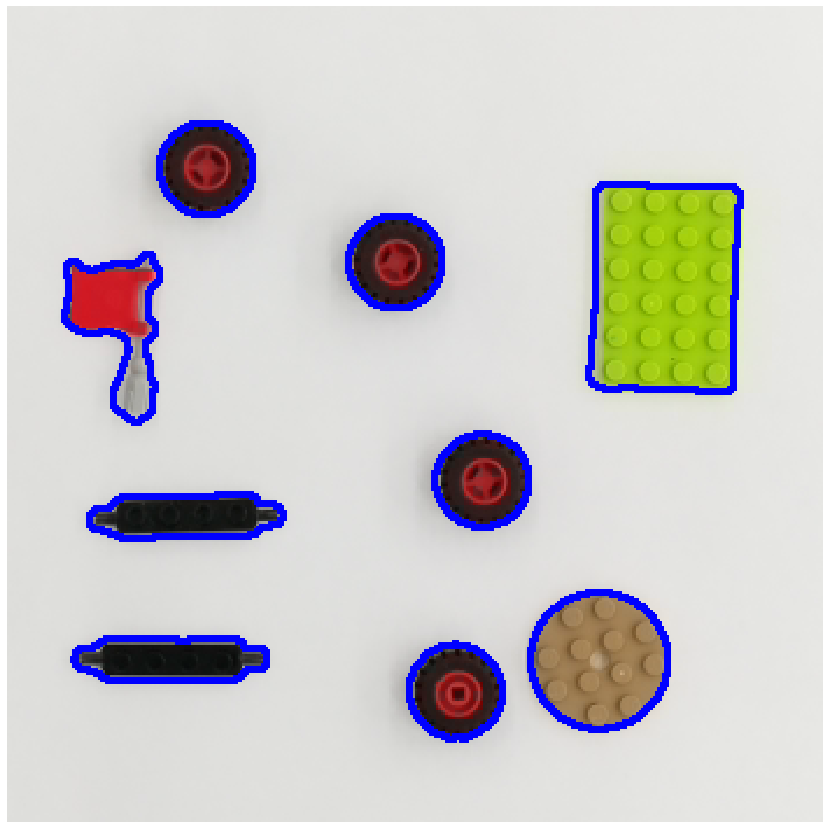

In [30]:
plt.figure(figsize = (15,15))
plt.imshow(img_contour)
plt.axis('off')
plt.show()

#Feature Extraction

In [31]:
area_list=[]
aspect_ratio_list=[]

for i,contour in enumerate(contour_filter):

    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    img = cv2.circle(img_rgb,(cx,cy), 3, (255,0,0), -1)

    x,y,w,h = cv2.boundingRect(contour)
    aspect_ratio = round(float(w)/h, 2)
    img = cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2)
    img = cv2.putText(img_rgb ,"aspect_ratio: "+str(aspect_ratio),(cx-50,cy+35),cv2.FONT_HERSHEY_SIMPLEX ,0.3,(0,0,255),1,cv2.LINE_AA) 

    area = cv2.contourArea(contour)
    img = cv2.putText(img_rgb ,"area: "+str(int(area)),(cx-50,cy+25),cv2.FONT_HERSHEY_SIMPLEX ,0.3,(0,0,255),1,cv2.LINE_AA) 

    perimeter = cv2.arcLength(contour,True)
    img = cv2.putText(img_rgb ,"perimeter: "+str(int(perimeter)),(cx-50,cy+15),cv2.FONT_HERSHEY_SIMPLEX ,0.3,(0,0,255),1,cv2.LINE_AA) 

    img = cv2.putText(img_rgb ,"number: "+str(i),(cx-50,cy+5),cv2.FONT_HERSHEY_SIMPLEX ,0.3,(0,0,255),1,cv2.LINE_AA) 

    area_list.append(area)
    aspect_ratio_list.append(aspect_ratio)

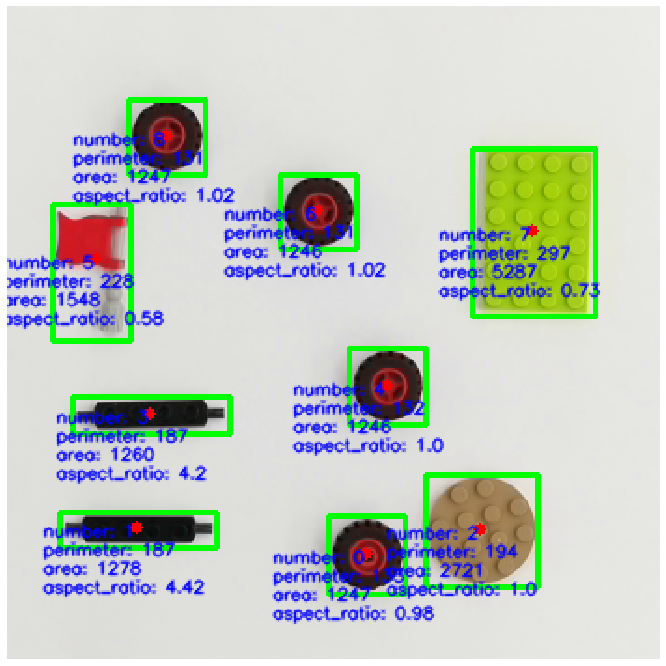

In [34]:
plt.figure(figsize = (12,12))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

#Classification

In [35]:
tag=['wheel','axle','disk','axle','wheel','flag','wheel','chasis','wheel']
tag_color={'wheel':'m','axle':'c','disk':'y','chasis':'g','flag':'r'}
tag_number={'wheel':'0','axle':'1','disk':'2','chasis':'3','flag':'4'}
number_tag={'0':'wheel','1':'axle','2':'disk','3':'chasis','4':'flag'}

newcomer_area=2000
newcomer_aspect_ratio=1.5
newcomer=[newcomer_area,newcomer_aspect_ratio]

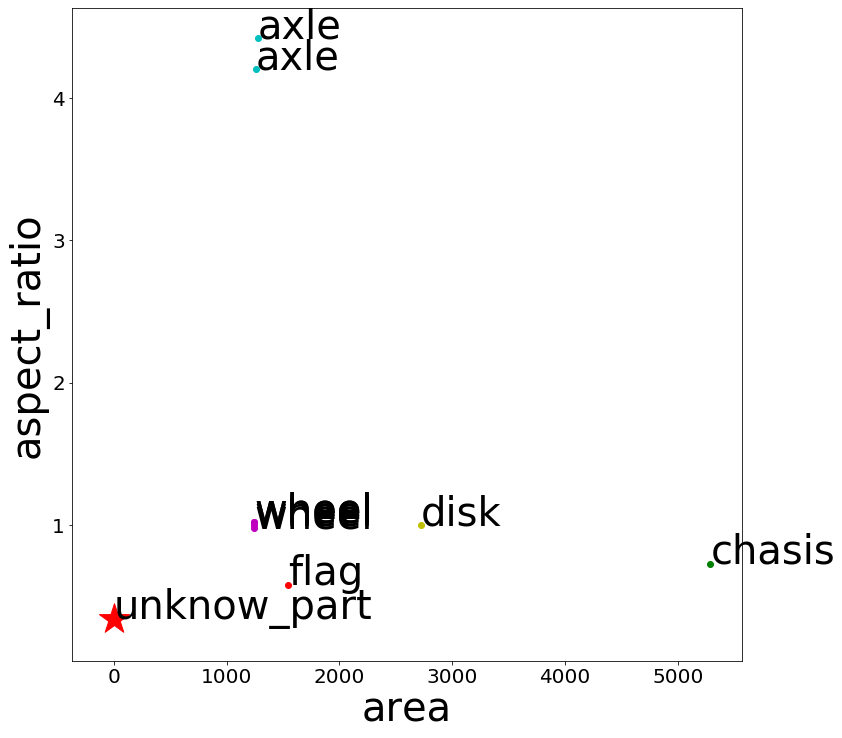

In [38]:
plt.figure(figsize = (12,12))

for i,t in enumerate(tag):
    plt.scatter(area_list[i],aspect_ratio_list[i],marker='o',color=tag_color[tag[i]])
    plt.text(area_list[i],aspect_ratio_list[i],t, fontsize=40)

    plt.xlabel('area',fontsize=40)
    plt.ylabel('aspect_ratio',fontsize=40)
    
    
plt.scatter(newcomer[0],newcomer[1],marker='*',s=1000,color='r')
plt.text(newcomer[0],newcomer[1],'unknow_part', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()  

In [37]:
trainData_x_norm = [float(i)/max(area_list) for i in area_list]
trainData_y_norm = [float(i)/max(aspect_ratio_list) for i in aspect_ratio_list]
newcomer=[newcomer[0]/max(area_list),newcomer[1]/max(aspect_ratio_list)]

In [40]:
def gen_random2d(x0=0,y0=0,r0=0.2):
    alpha = 2 * math.pi * random.random()
    r=r0 * math.sqrt(random.random())

    x = r * math.cos(alpha) + x0
    y = r * math.sin(alpha) + y0

    return x,y

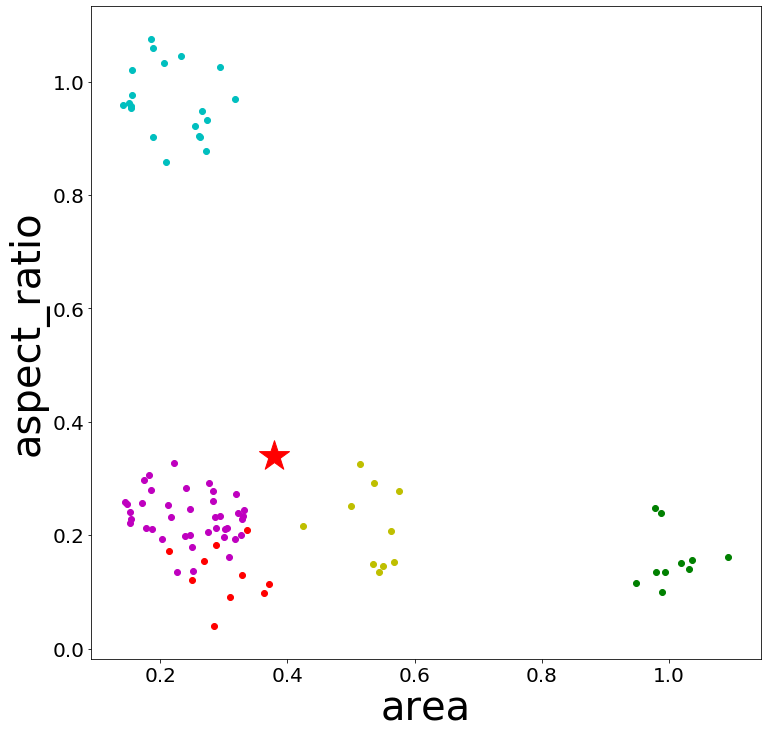

In [41]:
trainData_x=[]
trainData_y=[]
respones=[]

plt.figure(figsize = (12,12))

for i in range(len(trainData_x_norm)):
    x=trainData_x_norm[i]
    y=trainData_y_norm[i]
    for j in range(10):
        [xr,yr]=gen_random2d(x,y,0.1)
        trainData_x.append(xr) 
        trainData_y.append(yr)         
        respones.append(tag[i])
        
        plt.scatter(xr,yr,marker='o',color=tag_color[tag[i]])
        


plt.scatter(newcomer[0],newcomer[1],marker='*',s=1000,color='r')
plt.xlabel('area',fontsize=40)
plt.ylabel('aspect_ratio',fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()         

In [42]:
trainData=[ [trainData_x[i],trainData_y[i]] for i in range(len(trainData_x))]
respones = [tag_number[item] for item in respones] 
print(respones)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


In [43]:
train_arr = np.array(trainData).astype('float32')
respones_arr = np.array(respones).astype('float32')
newcomer_arr = np.array([newcomer]).astype(np.float32)

In [44]:
knn=cv2.ml.KNearest_create()
knn.train(train_arr,cv2.ml.ROW_SAMPLE,respones_arr)
ret,results,neighbour,dist=knn.findNearest(newcomer_arr, 3)

In [45]:
print('results',results)
print('neighbour',neighbour)
print('results',dist)

results [[0.]]
neighbour [[0. 0. 0.]]
results [[0.00805562 0.01139425 0.01269608]]


In [46]:
print("new part is:",number_tag[str(int(results[0][0]))])

new part is: wheel


In [47]:
data = np.array([train_arr[:,0],train_arr[:,1],respones_arr])
data=data.T
print(data)

[[0.2823932  0.25947604 0.        ]
 [0.31811365 0.19389994 0.        ]
 [0.25164124 0.13610306 0.        ]
 [0.22590293 0.13497372 0.        ]
 [0.24098723 0.28274328 0.        ]
 [0.3299363  0.23305178 0.        ]
 [0.23822527 0.19873188 0.        ]
 [0.24649747 0.24655618 0.        ]
 [0.1543623  0.22799028 0.        ]
 [0.18280306 0.30577168 0.        ]
 [0.29342678 1.0264918  1.        ]
 [0.26188138 0.90301687 1.        ]
 [0.15553822 1.0212281  1.        ]
 [0.18820429 1.0589213  1.        ]
 [0.15403132 0.95639133 1.        ]
 [0.2726637  0.93155015 1.        ]
 [0.25521225 0.9220888  1.        ]
 [0.23180027 1.0445256  1.        ]
 [0.15537083 0.9759145  1.        ]
 [0.18470718 1.0756278  1.        ]
 [0.5672295  0.1531686  2.        ]
 [0.5636081  0.20668252 2.        ]
 [0.5135446  0.32477847 2.        ]
 [0.54363406 0.13563788 2.        ]
 [0.5507614  0.14642254 2.        ]
 [0.42434224 0.21569084 2.        ]
 [0.5345635  0.14877032 2.        ]
 [0.49991295 0.25204003 2.  

In [48]:
datafile_path = "train_model.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, data)